# Project 1: Trends in General Happiness versus Financial Satisfaction and Work Satisfaction Over Time
## Group 11
- Elizabeth Hunter (mwm6nq)
- Michael Hijduk (aqt7bt)
- Eva Massarelli (ecm8yu)
- Anjali Mehta (wfn7ad)
- Anika Potluri (agu4yh)
## ! git clone https://www.github.com/DS3001/group11

# Summary

Research question(s), overview of methods and findings. Make sure to reference the codebook and describe the research strategy...

### Research Question 2 
One of the general topics this research project aimed to explore is what is the relationship between age and general happiness/satisfaction. The following are questions that explored this general theme: what age are people happiest, what age are people most financially satisfied, and what age are people most satisfied with their job. The project employed box plots to explore these questions and analyze the relationship between age and different forms of satisfaction. This analysis assesses the main findings, the statistical support for conclusions, the research strategy, and the interpretation of results.

# Data
Describe the source of data, variables, and challenges weaving in the cleaning code as is relevant. 
Data used for this project was sourced from the General Social Survey (GSS), a public opinion survey which has been administered annual in the U.S. starting in 1972. It is important to note that according to the GSS 2022 release notes:

"Changes in opinions, attitudes, and behaviors observed in 2021 and 2022 relative to historical trends may be due to actual change in concept over time and/or may have resulted from methodological changes made to the survey methodology during the COVID-19 global pandemic. Research and interpretation done using the 2021 and 2022 GSS data should take extra care to ensure the analysis reflects actual changes in public opinion and is not unduly influenced by the change in data collection methods. For more information on the 2021 and 2022 GSS methodology and its implications, please visit https://gss.norc.org/Get-The-Data."

To simplify the importation of the large data set, the data was imported into R and variables of interest, shown in data dictionary below, were seleted and exported to a comma separated value file.

| Variable        | Description                                                      | Potential Reponses |
| --- | --- | --- |
| AGE     | indicates the respondent's age |                     |
| YEAR    | indicates the year of the respondent's answers     |               |
| WRKSTAT | Answers the question: Last week were you working full time, part time, going to school, keeping house, or what?       | "working full time," "working part time," "with a joob, but not at work because of temporary illness, vacation, strike," "unemployed, laid off, looking for work," "retired," "in school," "keeping house," "other"  |
| RINCOME | Answers the question: Did you earn any income from [OCCUPATION DESCRIBED IN OCC-INDUSTRY] in [the last year]? |  "under \\$1,000,"  "\\$1,000 to \\$2,999,"  "\\$3,000 to \\$3,999,"  "\\$4,000 to \\$4,999,"  "\\$5,000 to \\$5,999,"  "\\$6,000 to \\$6,999,"  "\\$7,000 to \\$7,999"   |
| HAPPY   | Answers the question: how would you say things are these days--would you say that you are very happy, pretty happy, or not too happy?    | "very happy," "pretty happy," "not too happy"       |
| SATFIN  | Answers the question: We are interested in how people are getting along financially these days. So far as you and your family are concerned, would you say that you are pretty well satisfied with your present financial situation, more or less satisfied, or not satisfied at all?  | "pretty well satisfied," "more or less satisfied," "not satisfied at all" |
| SATJOB  | Answers the question: On the whole, how satisfied are you with the work you do -- would you say you are very satisfied, moderately satisfied, a little dissatisfied, or very dissatisfied?    | "very satisfied," "moderately satisfied," "a little dissatisfied," "very dissatisfied" |

See below for the first entries into our selected dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Data/selectedData.csv') # Import data into environment
df.head()

,age,year,wrkstat,rincome,happy,satfin,satjob
0,23.0,1972,working full time,NaN,not too happy,not satisfied at all,a little dissatisfied
1,70.0,1972,retired,NaN,not too happy,more or less satisfied,NaN
2,48.0,1972,working part time,NaN,pretty happy,pretty well satisfied,moderately satisfied
3,27.0,1972,working full time,NaN,not too happy,not satisfied at all,very satisfied
4,61.0,1972,keeping house,NaN,pretty happy,pretty well satisfied,NaN


To start wrangling the data, we first looked at the dimensions of the data and the unique variable names.

In [2]:
# wrangling
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables
print(df.columns, '\n') # Column names

(72390, 7) 

age        float64
year         int64
wrkstat     object
rincome     object
happy       object
satfin      object
satjob      object
dtype: object 

Index(['age', 'year', 'wrkstat', 'rincome', 'happy', 'satfin', 'satjob'], dtype='object') 



Many of the variables are of the "object" data type; because these data are categorical, this is okay.
We looked at age, year, and work status first. Per good data management practices, any data that we manipulated was put into a separate dataframe, which we called "gdf."

count    71621.000000
mean        46.555982
std         17.600417
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         89.000000
Name: age, dtype: float64 

[23. 70. 48. 27. 61. 26. 28. 21. 30. 56. 54. 49. 41. 24. 62. 46. 57. 58.
 71. 53. 42. 20. 25. 78. 35. 51. 76. 39. 64. 50. 40. 43. 37. 22. 31. 52.
 47. 45. 68. 63. 19. 55. 44. 34. 36. 74. 69. 29. 67. 75. 38. 73. 84. 82.
 72. 59. 33. 81. 65. 32. nan 60. 80. 66. 77. 18. 79. 83. 85. 88. 87. 89.
 86.] 



<AxesSubplot:>

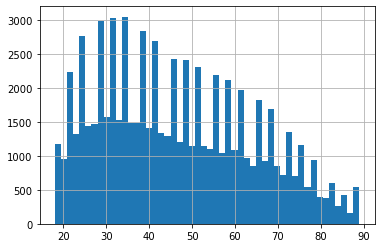

In [3]:
# Age
var = 'age'
print(df[var].describe(),'\n') # 72390-71612=769 missing values
print(df[var].unique(),'\n') # missing values are already in nan format
df[var].hist(bins=50) # Initial histogram, odd spikes may be due to how survey was previously administered

In [4]:
print('Total Missings: \n', sum(df[var].isnull()),'\n') # says 769 are missing, matches expected
gdf = df.loc[df[var].isnull() == 0, :] # makes df where only values that aren't null are included
print('Total Missings after nans removed: \n', sum(gdf[var].isnull()),'\n') # checks to see if nans were removed

Total Missings: 
 769 

Total Missings after nans removed: 
 0 



count    72390.000000
mean      1997.715541
std         15.109995
min       1972.000000
25%       1985.000000
50%       1998.000000
75%       2010.000000
max       2022.000000
Name: year, dtype: float64 



<AxesSubplot:>

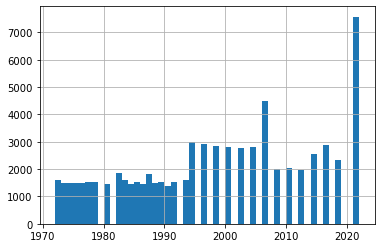

In [5]:
# Year
var = 'year'
print(df[var].describe(),'\n') # 72390-72390=0 missing values, no nans to remove
df[var].hist(bins=50) # Initial histogram, looks like some years are missing

count                 72354
unique                    8
top       working full time
freq                  35267
Name: wrkstat, dtype: object 

['working full time' 'retired' 'working part time' 'keeping house'
 'in school' 'unemployed, laid off, looking for work'
 'with a job, but not at work because of temporary illness, vacation, strike'
 'other' nan] 

working full time                                                             35267
retired                                                                       10886
keeping house                                                                 10764
working part time                                                              7430
unemployed, laid off, looking for work                                         2621
in school                                                                      2187
other                                                                          1643
with a job, but not at work because of temporary illne

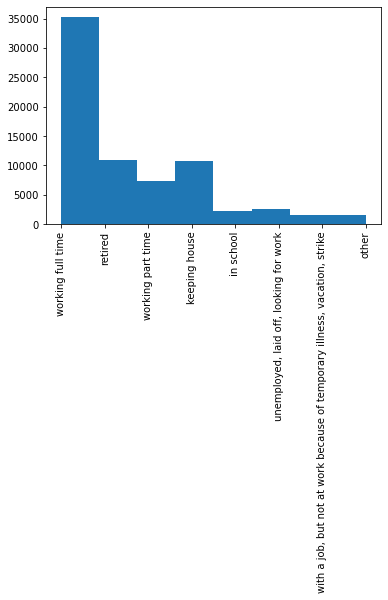

In [6]:
# Work status
var = 'wrkstat'
print(df[var].describe(),'\n') # 72390-72354=36 missing values expected
print(df[var].unique(),'\n') # 8 categories not including nan (will remove nans and "other")
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=8,grid=False), '\n') # plot
plt.xticks(rotation=90) # makes plot readable
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') # 36 missing values, already in nan form

In [7]:
gdf.loc[gdf[var] == 'with a job, but not at work because of temporary illness, vacation, strike', var] = 'with job, not at work rn' #shortening variable name  
gdf = gdf.loc[gdf['wrkstat'].isnull() == 0,:] # Removing the nan values as only 36 
gdf = gdf.loc[gdf['wrkstat'] != 'other',:] # Even though there are 1,643 "other" values, we decided to remove them
print(gdf[var].value_counts(), '\n')
gdf = gdf.rename(columns = {'wrkstat': 'work status'})

working full time                         34910
retired                                   10718
keeping house                             10672
working part time                          7366
unemployed, laid off, looking for work     2589
in school                                  2175
with job, not at work rn                   1544
Name: wrkstat, dtype: int64 



/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Now we then investigated income and converted the entries into real dollar amounts. We also cleaned work satisfaction and financial satisfaction. For this lab, we decided to drop null values from the data, as we were not confident in a method of interpolating values. However, after recent classes, we would likely use k-nearest neighbor in the future to handle some of the variable that included large amount of missing data, such as "rnicome," "happy," "satfin," and "satjob."

To clean "rincome," we converted the income values into term of real dollars so a more meaningful temporal comparison could be made.

   year     cf
0  1968  0.145
1  1969  0.153
2  1970  0.162
3  1971  0.169
4  1972  0.174
count               42333
unique                 12
top       $25,000 or more
freq                18249
Name: rincome, dtype: object 

[nan '$1,000 to $2,999' '$15,000 to $19,999' '$7,000 to $7,999'
 '$8,000 to $9,999' '$20,000 to $24,999' '$4,000 to $4,999'
 '$10,000 to $14,999' '$25,000 or more' '$3,000 to $3,999' 'under $1,000'
 '$5,000 to $5,999' '$6,000 to $6,999'] 

Total Missings: 
 30057 



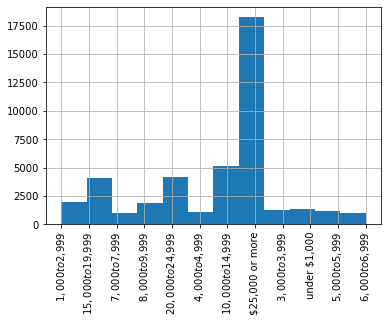

In [8]:
# Income
cpi = pd.read_excel('./Data/cpi.xlsx') #data from website https://liberalarts.oregonstate.edu/spp/polisci/faculty-staff/robert-sahr/inflation-conversion-factors-years-1774-estimated-2024-dollars-recent-years/individual-year-conversion-factor-table-0 
                                    # in a new excel with the year and conversion factor for money for that year to 2016, estimates 2017 to 2022 conversion factor to 2016
print(cpi.head()) #values from cpi data

var = 'rincome'
print(df[var].describe(),'\n') # 72390-42333=30057 missing values
print(df[var].unique(),'\n') # missing values are already in nan format
df[var].hist(bins=12) # odd spikes may be due to how survey previously pooled ages (Methodological 56)
plt.xticks(rotation=90)
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') # missing values match expected

In [9]:
gdf = gdf.loc[gdf['rincome'].isnull() == 0,:] # remove nans
gdf = gdf.replace(['$1,000 to $2,999','$15,000 to $19,999','$7,000 to $7,999','$8,000 to $9,999','$20,000 to $24,999','$4,000 to $4,999','$10,000 to $14,999','$25,000 or more','$3,000 to $3,999','under $1,000','$5,000 to $5,999','$6,000 to $6,999'], 
                [1500,17500,7500,9000,22500,4500,12500,25000,3500,1000,5500,6500]) # replace with middle
print(gdf[var].unique(),'\n') # check

[ 1500 17500  7500  9000 22500  4500 12500 25000  3500  1000  5500  6500] 



In [10]:
md = cpi.merge(gdf, on='year') #merging the data from the cpi and the data file cleaning on the common relation of year                                   
md['Income_2016'] = (md[var]/md['cf']) #creating the income related to the year of 2016 through the conversion factor -- divide the income by the conversion factor for that year
print(md.loc[md['year'] == 2022, 'cf']) #cf from 2022 to 2016 is 1.149

39974    1.149
39975    1.149
39976    1.149
39977    1.149
39978    1.149
         ...  
41862    1.149
41863    1.149
41864    1.149
41865    1.149
41866    1.149
Name: cf, Length: 1893, dtype: float64


               year            cf           age      rincome    Income_2016  \
count  41867.000000  41867.000000  41867.000000  41867.00000   41867.000000   
mean    1998.486039      0.692248     41.461414  17365.02496   27462.287865   
std       14.184826      0.271401     13.747698   8546.35000   16318.239273   
min     1974.000000      0.205000     18.000000   1000.00000     870.322019   
25%     1987.000000      0.473000     30.000000   9000.00000   17500.000000   
50%     1998.000000      0.679000     40.000000  22500.00000   25773.195876   
75%     2010.000000      0.909000     51.000000  25000.00000   35496.957404   
max     2022.000000      1.149000     89.000000  25000.00000  121951.219512   

         real_income  
count   41867.000000  
mean    31554.168757  
std     18749.656925  
min      1000.000000  
25%     20107.500000  
50%     29613.402062  
75%     40786.004057  
max    140121.951220   



<AxesSubplot:>

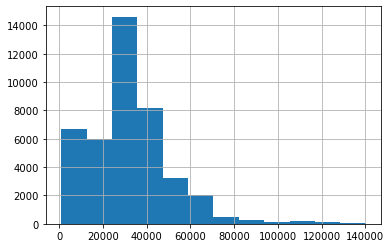

In [11]:
md['real_income'] = md['Income_2016'] *(1.149) # multiply the income from 2016 by the conversion factor for 2022 to get the value of money in 2022
md['real_income'].value_counts()
print(md.describe(),'\n')
md['real_income'].hist(bins=12)

In [12]:
gdf = gdf.rename(columns = {'rincome': 'income'})
gdf['income'] = md['real_income']

count            67588
unique               3
top       pretty happy
freq             37813
Name: happy, dtype: object 

['not too happy' 'pretty happy' 'very happy' nan] 

pretty happy     37813
very happy       20385
not too happy     9390
Name: happy, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 

Total Missings: 
 4802 



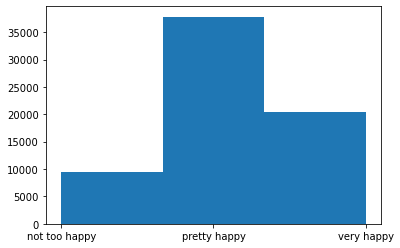

In [13]:
#happy
var = 'happy'
print(df[var].describe(),'\n') # 72390-67588=4,802 missing values expected
print(df[var].unique(),'\n') # 3 categories not including nan
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=3,grid=False), '\n')
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') #number of missings is same as nan
#assuming missing values is that people are unhappy

In [14]:
gdf.loc[gdf[var].isnull(), var] = 'not happy' # Changing rows with nans to a new category called "not happy"
print('Total Missings: \n', sum(gdf[var].isnull()),'\n') # checks that nulls were renamed

Total Missings: 
 0 



count                      67722
unique                         3
top       more or less satisfied
freq                       29987
Name: satfin, dtype: object 

['not satisfied at all' 'more or less satisfied' 'pretty well satisfied'
 nan] 

more or less satisfied    29987
pretty well satisfied     19726
not satisfied at all      18009
Name: satfin, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 

Total Missings: 
 4668 



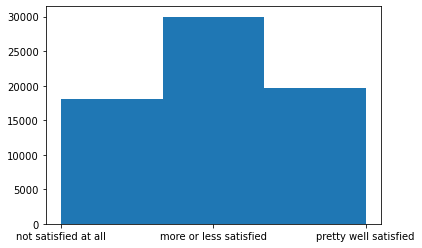

In [15]:
#satfin
var = 'satfin'
print(df[var].describe(),'\n') # 72390-67722=4,668 missing values expected
print(df[var].unique(),'\n') # 3 categories not including nan
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=3,grid=False), '\n')
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') #number of missings is same as nan

In [16]:
gdf = gdf.loc[gdf['satfin'].isnull() == 0,:] # remove nans
gdf = gdf.rename(columns = {'satfin': 'financial satisfaction'})

count              51887
unique                 4
top       very satisfied
freq               24718
Name: satjob, dtype: object 

['a little dissatisfied' nan 'moderately satisfied' 'very satisfied'
 'very dissatisfied'] 

very satisfied           24718
moderately satisfied     19854
a little dissatisfied     5157
very dissatisfied         2158
Name: satjob, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 

Total Missings: 
 20503 



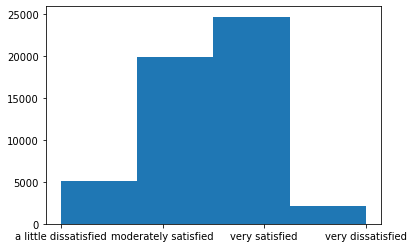

In [17]:
#satjob
var = 'satjob'
print(df[var].describe(),'\n') # 72390-51887=20,503 missing values expected
print(df[var].unique(),'\n') # 4 categories not including nan
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=4,grid=False), '\n')
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') #number of expected missings is same as nan

In [18]:
gdf = gdf.loc[gdf[var].isnull() == 0,:] # remove nans
gdf = gdf.rename(columns = {'satjob': 'job satisfaction'})

Once the data was cleaned, we took a look at the dataframe without missing values.

In [19]:
gdf.head()

,age,year,work status,income,happy,financial satisfaction,job satisfaction
3118,41.0,1974,working full time,56994.047619,very happy,more or less satisfied,very satisfied
3121,58.0,1974,working full time,56994.047619,pretty happy,more or less satisfied,moderately satisfied
3123,48.0,1974,working full time,41035.714286,very happy,pretty well satisfied,very satisfied
3126,54.0,1974,working full time,29636.904762,very happy,not satisfied at all,very satisfied
3131,22.0,1974,working full time,4559.523810,very happy,pretty well satisfied,very satisfied


In [20]:
print(gdf.shape) # 72,390-36,702=35,688 rows removed while cleaning
gdf.describe()

(36702, 7)


,age,year,income
count,36702.000000,36702.000000,22726.000000
mean,41.035420,1997.868699,30362.757880
std,13.172095,14.450309,16217.621422
min,18.000000,1974.000000,1000.000000
25%,30.000000,1986.000000,20975.659229
50%,40.000000,1996.000000,29132.860041
75%,51.000000,2010.000000,40062.761506
max,89.000000,2022.000000,113988.095238


# Results
Show visualizations and discuss findings...

### Research Question 1 

### Research Question 2 
1. Age and Happiness: The research shows that the mean age for people reporting very high happiness is older, but roughly the mean ages for those reported they are 'very happy', 'pretty happy' and 'not too happy' are generally around the same age (~40 years old). This suggests that generally younger people are slightly more unhappy, but then it is difficult to assert why the results after that are so varied. 
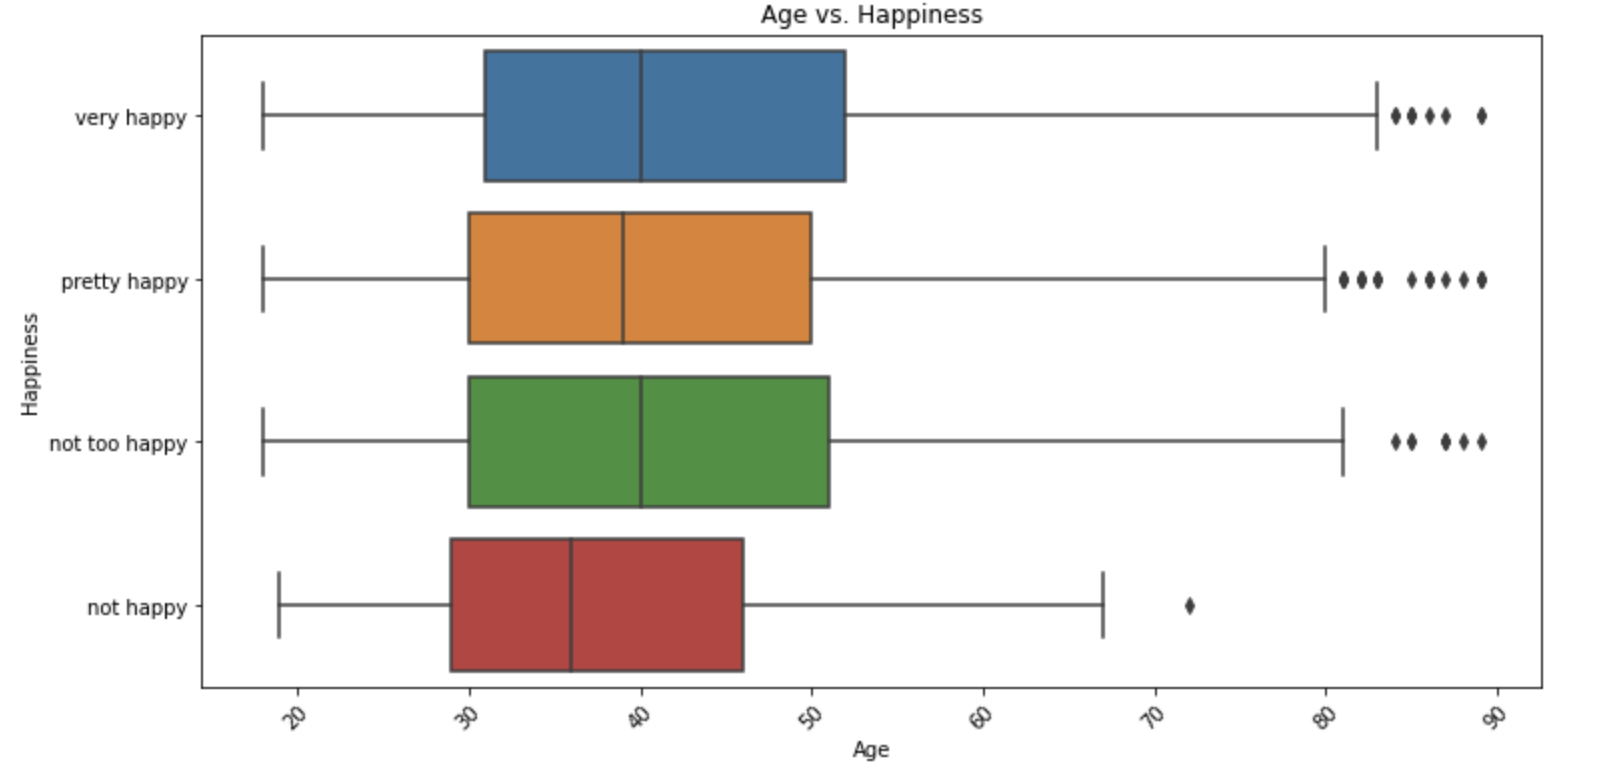

2. Age and Financial Satisfaction: The research indicates that the mean age for individuals reporting high financial satisfaction is older (~44). This implies that financial satisfaction tends to increase with age, possibly due to career progression and accumulation of wealth. This finding aligns with the life-course theory, which suggests that people become more financially satisfied as they progress through life stages.
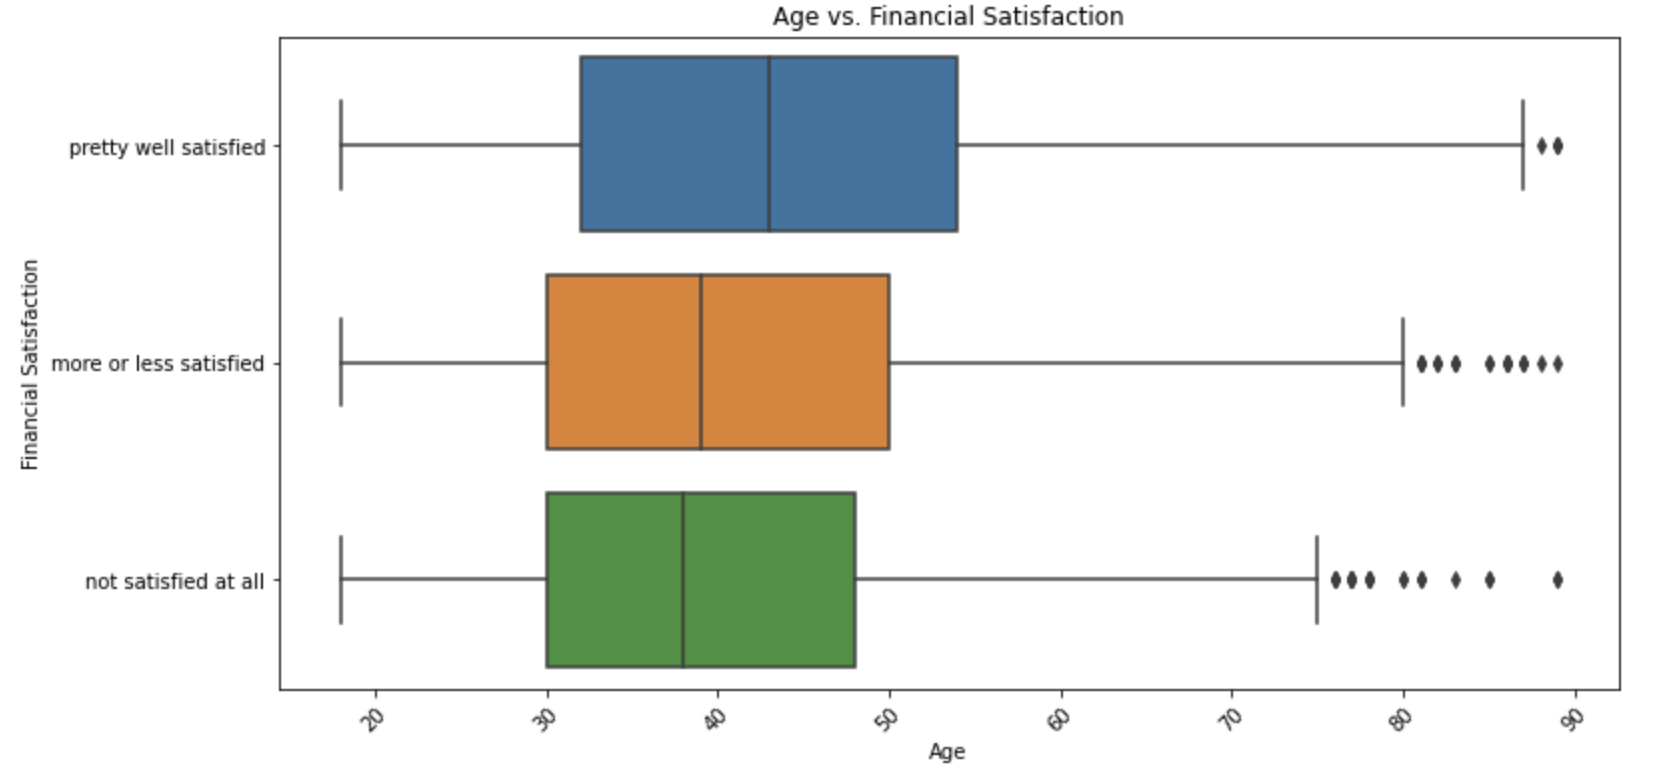

3. Age and Job Satisfaction: The analysis reveals that the mean age for very high job satisfaction is older (~43). This suggests that job satisfaction tends to increase with age, possibly due to career stability, experience, and finding one's professional niche.
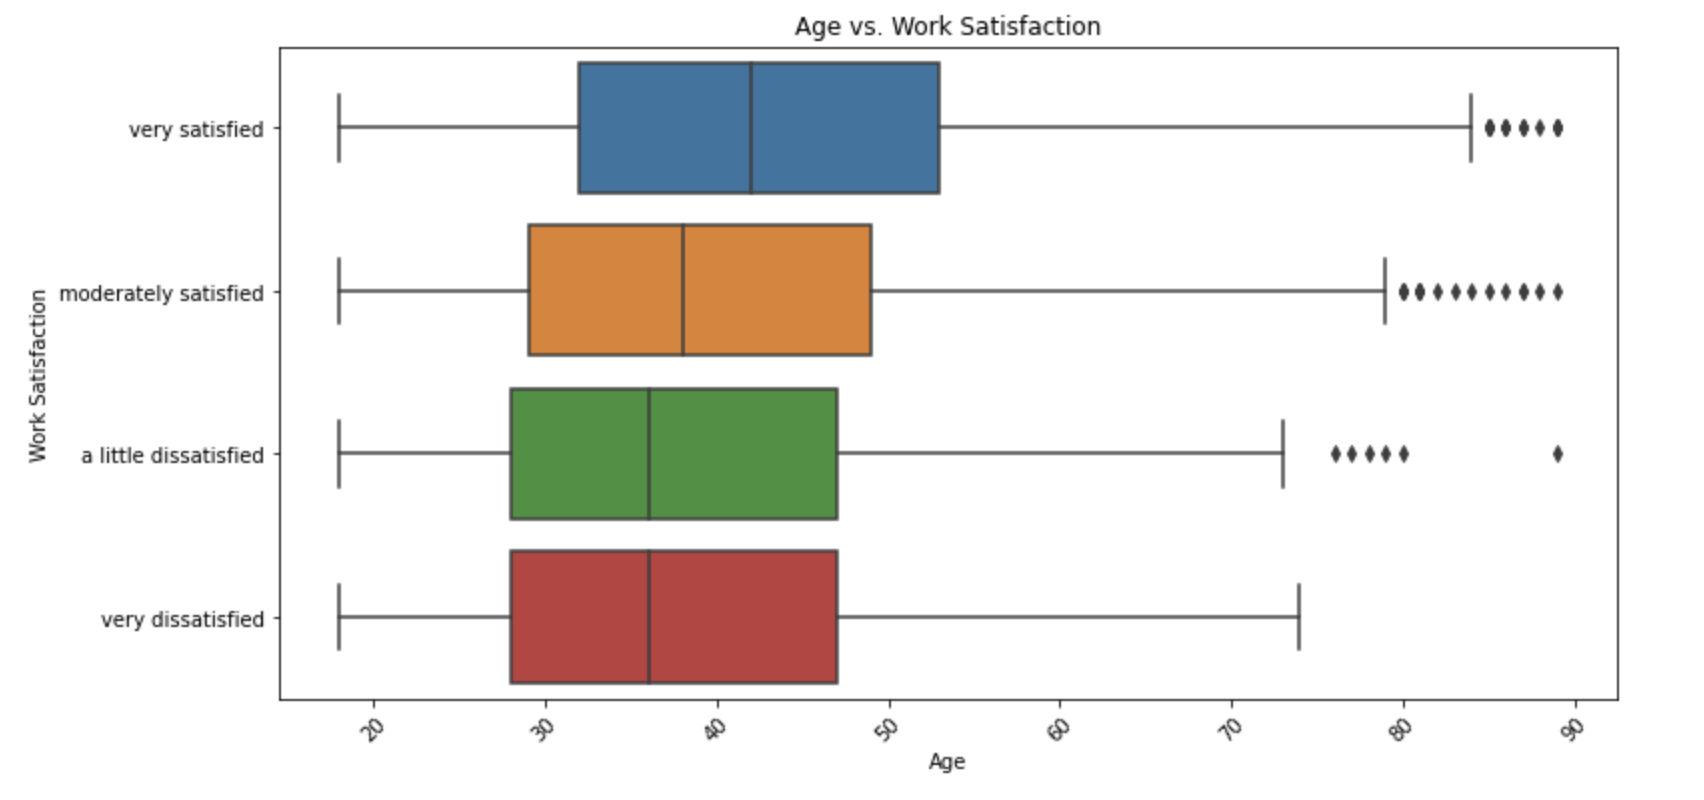


The research strategy employed in this question involved the use of box plots to visually compare age and satisfaction levels. The use of box plots is an effective visual representation of the data, allowing for a quick comparison of age and different types of satisfaction. 


# Conclusion
Re-summarize the project, defend from criticism, suggest future work...

### Research Question 1 

### Research Question 2
The research question does not delve into the reasons behind the observed age-satisfaction relationships. While it identifies trends, it does not explain why these trends exist. Additionally, the research does not consider potential confounding variables that may affect satisfaction levels, such as social and economic factors.
To build upon this research, it is essential to investigate the factors causing unhappiness, especially among younger individuals. Exploring the role of loneliness, economic instability, and career prospects in happiness and life satisfaction could be a valuable extension of this project. Additionally, examining how external factors, such as societal changes or economic conditions, influence these age-satisfaction relationships would provide a more comprehensive understanding. 

# Works Cited

Davern, Michael; Bautista, Rene; Freese, Jeremy; Herd, Pamela; and Morgan, Stephen L.; General Social Survey
1972-2022. [Machine-readable data file]. Principal Investigator, Michael Davern; Co-Principal Investigators,
Rene Bautista, Jeremy Freese, Pamela Herd, and Stephen L. Morgan. NORC ed. Chicago, 2023. 1 datafile
(Release 1) and 1 codebook (2022 Release 1).